# HW_11

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM

In [31]:
max_features = 10000
maxlen = 500
batch_size = 256
epochs = 7

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)


SimpleRNN

In [43]:
start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(SimpleRNN(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")


Epoch 1/7
69/69 [==============================] - 44s 612ms/step - loss: 0.6882 - acc: 0.5433 - val_loss: 0.6210 - val_acc: 0.6861
Epoch 2/7
69/69 [==============================] - 43s 617ms/step - loss: 0.5785 - acc: 0.7138 - val_loss: 0.4651 - val_acc: 0.8069
Epoch 3/7
69/69 [==============================] - 41s 587ms/step - loss: 0.4723 - acc: 0.7929 - val_loss: 0.4802 - val_acc: 0.7685
Epoch 4/7
69/69 [==============================] - 39s 573ms/step - loss: 0.4014 - acc: 0.8336 - val_loss: 0.4098 - val_acc: 0.8231
Epoch 5/7
69/69 [==============================] - 38s 551ms/step - loss: 0.3586 - acc: 0.8559 - val_loss: 0.3436 - val_acc: 0.8601
Epoch 6/7
69/69 [==============================] - 39s 568ms/step - loss: 0.3166 - acc: 0.8782 - val_loss: 0.3266 - val_acc: 0.8668
Epoch 7/7
69/69 [==============================] - 45s 660ms/step - loss: 0.2965 - acc: 0.8843 - val_loss: 0.3616 - val_acc: 0.8644

Total training time: 323.68 seconds


LSTM

In [33]:
start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_lstm = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")

Epoch 1/7
69/69 [==============================] - 13s 152ms/step - loss: 0.6869 - acc: 0.5527 - val_loss: 0.6133 - val_acc: 0.7123
Epoch 2/7
69/69 [==============================] - 7s 100ms/step - loss: 0.5279 - acc: 0.7576 - val_loss: 0.4184 - val_acc: 0.8352
Epoch 3/7
69/69 [==============================] - 8s 117ms/step - loss: 0.3992 - acc: 0.8350 - val_loss: 0.6462 - val_acc: 0.7113
Epoch 4/7
69/69 [==============================] - 6s 94ms/step - loss: 0.3366 - acc: 0.8652 - val_loss: 0.3143 - val_acc: 0.8743
Epoch 5/7
69/69 [==============================] - 6s 88ms/step - loss: 0.2976 - acc: 0.8847 - val_loss: 0.3214 - val_acc: 0.8643
Epoch 6/7
69/69 [==============================] - 6s 87ms/step - loss: 0.2636 - acc: 0.9006 - val_loss: 0.2834 - val_acc: 0.8896
Epoch 7/7
69/69 [==============================] - 5s 77ms/step - loss: 0.2458 - acc: 0.9069 - val_loss: 0.2783 - val_acc: 0.8905

Total training time: 52.38 seconds


Bidirectional LSTM

In [34]:
from keras.layers import Bidirectional

start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_bidirectional = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")

Epoch 1/7
69/69 [==============================] - 15s 167ms/step - loss: 0.6904 - acc: 0.5353 - val_loss: 0.6627 - val_acc: 0.5771
Epoch 2/7
69/69 [==============================] - 9s 125ms/step - loss: 0.5832 - acc: 0.7162 - val_loss: 0.4852 - val_acc: 0.7935
Epoch 3/7
69/69 [==============================] - 8s 117ms/step - loss: 0.4519 - acc: 0.8091 - val_loss: 0.4545 - val_acc: 0.7964
Epoch 4/7
69/69 [==============================] - 8s 120ms/step - loss: 0.3782 - acc: 0.8470 - val_loss: 0.4284 - val_acc: 0.8095
Epoch 5/7
69/69 [==============================] - 7s 99ms/step - loss: 0.3269 - acc: 0.8726 - val_loss: 0.3181 - val_acc: 0.8703
Epoch 6/7
69/69 [==============================] - 6s 86ms/step - loss: 0.2853 - acc: 0.8926 - val_loss: 0.3057 - val_acc: 0.8749
Epoch 7/7
69/69 [==============================] - 6s 92ms/step - loss: 0.2620 - acc: 0.9031 - val_loss: 0.2872 - val_acc: 0.8881

Total training time: 85.28 seconds


Deep RNN

In [35]:
start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_deep = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")

Epoch 1/7
69/69 [==============================] - 17s 181ms/step - loss: 0.6930 - acc: 0.5083 - val_loss: 0.6921 - val_acc: 0.5071
Epoch 2/7
69/69 [==============================] - 9s 135ms/step - loss: 0.6335 - acc: 0.6293 - val_loss: 0.5244 - val_acc: 0.7537
Epoch 3/7
69/69 [==============================] - 10s 140ms/step - loss: 0.4550 - acc: 0.7956 - val_loss: 0.5091 - val_acc: 0.7521
Epoch 4/7
69/69 [==============================] - 9s 125ms/step - loss: 0.3636 - acc: 0.8503 - val_loss: 0.3390 - val_acc: 0.8605
Epoch 5/7
69/69 [==============================] - 7s 105ms/step - loss: 0.3138 - acc: 0.8738 - val_loss: 0.3119 - val_acc: 0.8713
Epoch 6/7
69/69 [==============================] - 8s 114ms/step - loss: 0.2729 - acc: 0.8952 - val_loss: 0.3046 - val_acc: 0.8747
Epoch 7/7
69/69 [==============================] - 7s 106ms/step - loss: 0.2462 - acc: 0.9059 - val_loss: 0.3049 - val_acc: 0.8796

Total training time: 86.72 seconds


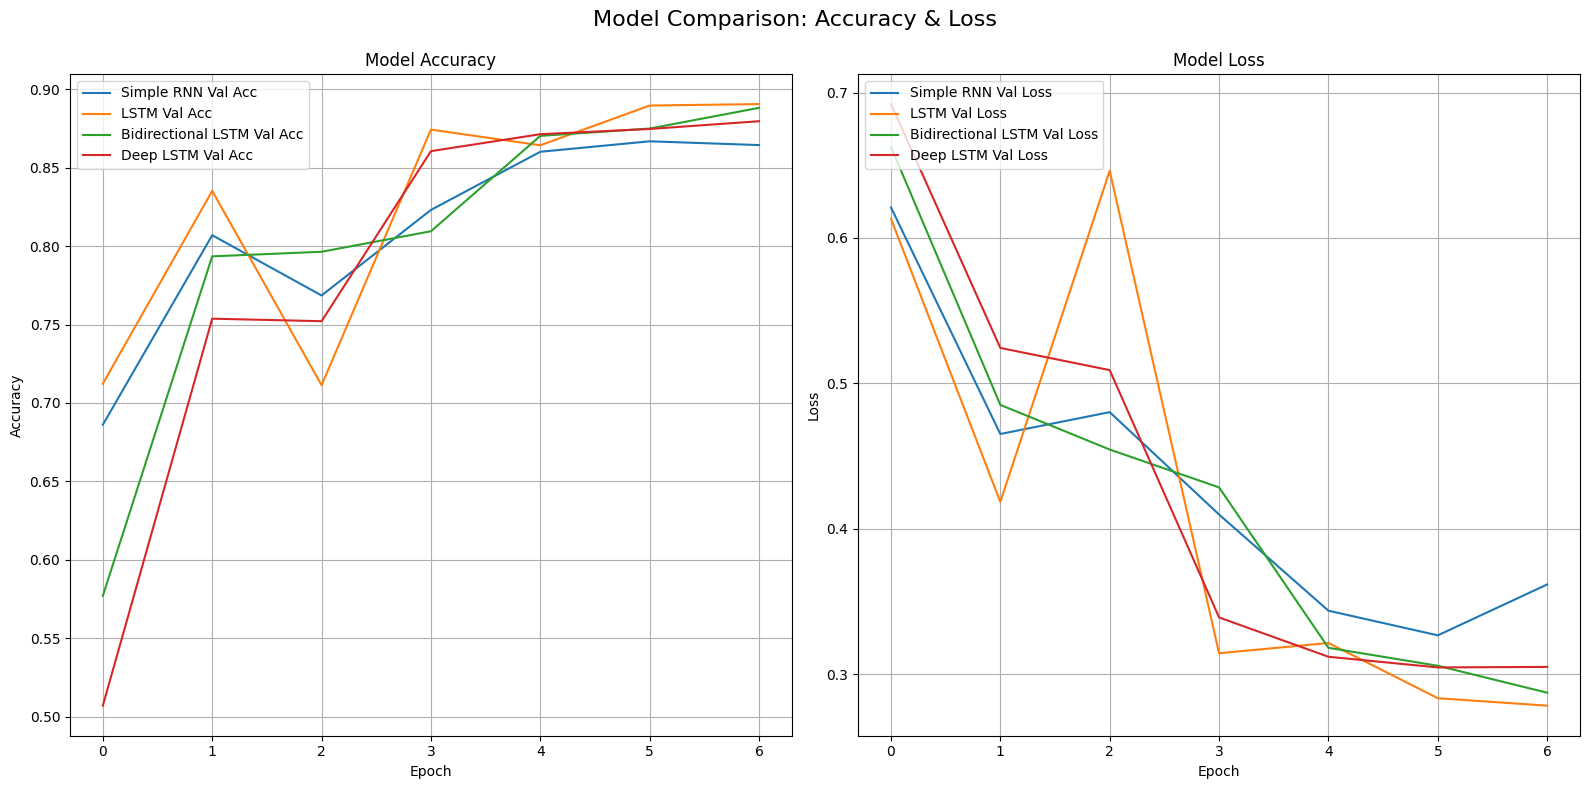

In [45]:
import matplotlib.pyplot as plt

def plot_history(histories, title):
    plt.figure(figsize=(16, 8))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    for name, history in histories:

        plt.plot(history.history['val_acc'], label=f'{name} Val Acc')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()

    # Loss subplot
    plt.subplot(1, 2, 2)
    for name, history in histories:

        plt.plot(history.history['val_loss'], label=f'{name} Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.9)  # Adjust title position
    plt.show()


plot_history(histories, 'Model Comparison: Accuracy & Loss')


In [46]:
# Список історій для порівняння
histories = [
    ("Simple RNN", history_rnn),
    ("LSTM", history_lstm),
    ("Bidirectional LSTM", history_bidirectional),
    ("Deep LSTM", history_deep)
]

for name, history in histories:

    train_acc = history.history['acc'][-1]
    _, test_acc = history.model.evaluate(input_test, y_test, verbose=0)

    print(f"{name}:")
    print(f"Train accuracy: {train_acc:.4f} | Test accuracy: {test_acc:.4f} | Difference accuracy: {(train_acc - test_acc)*100:.2f}%")
    print("-"*75)


Simple RNN:
Train accuracy: 0.8843 | Test accuracy: 0.8539 | Difference accuracy: 3.04%
---------------------------------------------------------------------------
LSTM:
Train accuracy: 0.9069 | Test accuracy: 0.8829 | Difference accuracy: 2.40%
---------------------------------------------------------------------------
Bidirectional LSTM:
Train accuracy: 0.9031 | Test accuracy: 0.8799 | Difference accuracy: 2.32%
---------------------------------------------------------------------------
Deep LSTM:
Train accuracy: 0.9059 | Test accuracy: 0.8738 | Difference accuracy: 3.20%
---------------------------------------------------------------------------


Серед усіх моделей точність Simple RNN є найнижчою 85,39% та час навчання найбільший 323.68 seconds. Bidirectional LSTM, Deep LSTM приблизно однаковий результат. Найкраща модель LSTM, яка показала точність 88,29% і найменьший час навчання 52.38 seconds. Як показала практика, imdb виявився складним датасетом для високої точності.   